In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df_train = pd.read_csv('../Dataset/preprocessed_dataset.csv')
df_test = pd.read_csv('../Dataset/preprocessed_datatest.csv')

# Menggabungkan judul dan abstrak supaya representasi dokumen lebih kaya
df_train['Combined_Text'] = df_train['Preprocessed_Judul'] + ' ' + df_train['Preprocessed_Abstrak']
df_test['Combined_Text'] = df_test['Preprocessed_Judul'] + ' ' + df_test['Preprocessed_Abstrak']

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

#Transformasi teks ke bentuk vektor TF-IDF
tfidf_train = tfidf_vectorizer.fit_transform(df_train['Combined_Text'])
tfidf_test = tfidf_vectorizer.transform(df_test['Combined_Text'])

print(f"TF-IDF Matrix Data Train berhasil dibuat dengan shape: {tfidf_train.shape}")
print(f"TF-IDF Matrix Data Test berhasil dibuat dengan shape: {tfidf_test.shape}")



TF-IDF Matrix Data Train berhasil dibuat dengan shape: (118, 6137)
TF-IDF Matrix Data Test berhasil dibuat dengan shape: (50, 6137)


In [4]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)

['000000492' '000003964' '00005' ... 'zaman' 'zoho' 'zoning']


# Implementasi Cosine Similarity

In [5]:
cos_sim = cosine_similarity(tfidf_test, tfidf_train)

cos_sim_df = pd.DataFrame(cos_sim)

print("Cosine Similarity Matrix berhasil dibuat!")
print(cos_sim_df.head())

Cosine Similarity Matrix berhasil dibuat!
        0         1         2         3         4         5         6    \
0  0.000000  0.178188  0.180143  0.133378  0.116232  0.138143  0.024616   
1  0.000000  0.105923  0.085986  0.066409  0.083433  0.123240  0.021429   
2  0.002294  0.200175  0.108965  0.159921  0.157242  0.202738  0.028405   
3  0.012375  0.152750  0.081778  0.106070  0.096366  0.145304  0.026303   
4  0.068089  0.052924  0.030646  0.044614  0.036259  0.051303  0.009300   

        7         8         9    ...       108       109       110       111  \
0  0.171968  0.096275  0.173040  ...  0.146621  0.116716  0.128408  0.111293   
1  0.083116  0.086977  0.109617  ...  0.099548  0.051532  0.058302  0.081420   
2  0.196182  0.192673  0.141047  ...  0.143866  0.153243  0.142900  0.175466   
3  0.124841  0.167258  0.114872  ...  0.093453  0.084748  0.133478  0.113935   
4  0.050921  0.037484  0.045938  ...  0.048390  0.025657  0.032721  0.046320   

        112       113     

# Fungsi untuk menentukan tingkat kemiripan

In [6]:
results = []

for i, test_row in enumerate(cos_sim):
    top_match_idx = test_row.argmax()
    top_score = test_row[top_match_idx]

    results.append({
        'Test_Index': i,
        'Test_Judul': df_test.loc[i, 'Judul'],
        'Most_Similar_Train_Judul': df_train.loc[top_match_idx, 'Judul'],
        'Test_Abstrak': df_test.loc[i, 'Abstrak'],
        'Most_Similar_Train_Abstrak': df_train.loc[top_match_idx, 'Abstrak'],
        'Similarity_Score': round(top_score, 4)
    })

similarity_df = pd.DataFrame(results)

similarity_df.head()

,Test_Index,Test_Judul,Most_Similar_Train_Judul,Test_Abstrak,Most_Similar_Train_Abstrak,Similarity_Score
0,0,Implementasi Segmentasi Pakaian Menggunakan Me...,Klasifikasi Tumor Otak Pada Citra MRI Mengguna...,Implementasi Mask R-CNN merupakan pendekatan u...,Tumor otak adalah salah satu penyakit yang pal...,0.3413
1,1,Sistem Deteksi Android Malware Menggunakan Met...,Rancang Bangun Stetoskop Elektronik Berbasis A...,Malware merupakan perangkat lunak jahat yang d...,Penyakit jantung merupakan salah satu penyebab...,0.2124
2,2,Klasifikasi Penyakit Berdasarkan Foto Rontgen ...,Analisis Sentimen Masyarakat Indonesia Mengena...,Pada tahun 2019 seluruh dunia terdampak pandem...,World Health Organization (WHO) mendeklarasi-k...,0.3218
3,3,Analisis Sentimen Berdasar Aspek Review Kuline...,Analisis Sentimen Dan Clustering Pada Pengguna...,Makanan merupakan hal yang selalu dekat dengan...,Tiket.com adalah perusahaan agen untuk pelayan...,0.3009
4,4,PENGENALAN WAJAH MENGGUNAKAN METODE DEEP NEURA...,Identifikasi dan Klasifikasi Tingkat Ketidak...,Metode pengenalan identitas dilakukan dengan m...,Tugas akhir ini membahas tentang pengidentifik...,0.2484


In [7]:
#similarity_df.to_csv('hasil_kemiripan_test_vs_train_dengan_abstrak.csv', index=False, encoding='utf-8-sig')

# Evaluasi Model

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Labeling pada data tes
Labeling dilakukan secara manual pada 50 data tes yang bertujuan agar pelabelan tetap objektif.

In [9]:
labels = [0] * 50

target_indices = [7, 18, 29, 31, 35, 46]
for idx in target_indices:
    labels[idx] = 1

df_test['Label'] = labels

df_test.to_csv('preprocessed_datatest_labeled.csv', index=False, encoding='utf-8-sig')

[[44  0]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.50      0.67         6

    accuracy                           0.94        50
   macro avg       0.97      0.75      0.82        50
weighted avg       0.94      0.94      0.93        50



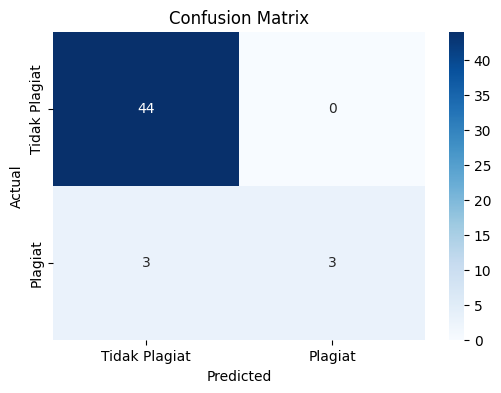

In [19]:
labeled_df_test = pd.read_csv('../Dataset/preprocessed_datatest_labeled.csv')

max_cos_sim = np.max(cos_sim, axis=1)

y_true = labeled_df_test['Label']
y_pred = (max_cos_sim >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

print(conf_matrix)
print(class_report)
# Buat heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Plagiat', 'Plagiat'], yticklabels=['Tidak Plagiat', 'Plagiat'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
labeled_df_test['Similarity_Score'] = max_cos_sim
labeled_df_test['Prediksi'] = y_pred

labeled_df_test.head()

,Judul,Penulis,Link,Abstrak,Preprocessed_Judul,Preprocessed_Abstrak,Combined_Text,Label,Similarity_Score,Prediksi
0,Implementasi Segmentasi Pakaian Menggunakan Me...,"Gita, Kartika Diva Asmara",http://repository.its.ac.id/116398/,Implementasi Mask R-CNN merupakan pendekatan u...,implementasi segmentasi pakai metode mask rcnn,implementasi mask rcnn dekat segmentasi objek ...,implementasi segmentasi pakai metode mask rcnn...,0,0.341320,0
1,Sistem Deteksi Android Malware Menggunakan Met...,"Abidin, Zainal",http://repository.its.ac.id/99166/,Malware merupakan perangkat lunak jahat yang d...,sistem deteksi android malware metode gated re...,malware perangkat lunak jahat rancang tuju rus...,sistem deteksi android malware metode gated re...,0,0.212385,0
2,Klasifikasi Penyakit Berdasarkan Foto Rontgen ...,"Abiyyi, Muhammad Zuhdi Afi",http://repository.its.ac.id/98468/,Pada tahun 2019 seluruh dunia terdampak pandem...,klasifikasi sakit dasar foto rontgen thorax me...,2019 dunia dampak pandemi covid19 covid19 seba...,klasifikasi sakit dasar foto rontgen thorax me...,0,0.321777,0
3,Analisis Sentimen Berdasar Aspek Review Kuline...,"Ajipangestu, Drajad Bima",http://repository.its.ac.id/84978/,Makanan merupakan hal yang selalu dekat dengan...,analisis sentimen dasar aspek review kuliner r...,makan iring kembang duduk bisnis kuliner resto...,analisis sentimen dasar aspek review kuliner r...,0,0.300894,0
4,PENGENALAN WAJAH MENGGUNAKAN METODE DEEP NEURA...,"Akbar, Afrizal Laksita",http://repository.its.ac.id/78130/,Metode pengenalan identitas dilakukan dengan m...,kenal wajah metode deep neural networks padu m...,metode kenal identitas wajah sidik jari telapa...,kenal wajah metode deep neural networks padu m...,0,0.248448,0
